# Different Distributions

Testing Gausssian distribution

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import equadratures as eq
from tqdm.notebook import tqdm, trange
import time

order = 10
parameter = eq.Parameter(lower=-1, upper=1, order=order, distribution='Gaussian', shape_parameter_A = -1, shape_parameter_B=0.8)
basis = eq.Basis('univariate')
poly = eq.Poly(parameter, basis, method='numerical-integration')

points, weights = poly.get_points_and_weights()

def l(x):
    return np.sin(x)+np.cos(x)

xValues = np.linspace(-1., 1., 1000)

eval = float( 2  * np.dot(weights , eq.evaluate_model(points, l) ) )
print(eval)

-0.40375880546278164


Testing gamma distribution:

In [44]:

parameter2 = eq.Parameter(lower=-1, upper=1, order=order, distribution='gamma')
basis2 = eq.Basis('univariate')
poly2 = eq.Poly(parameter2, basis2, method='numerical-integration')

points2, weights2 = poly2.get_points_and_weights()


eval2 = float( 2  * np.dot(weights2, eq.evaluate_model(points2, l) ) )
print(eval2)

2.0001664951821003


# Error versus order

We will be looking at the following 4 univariate functions:
$$
\begin{aligned}
F(x) &= \int_{-1}^{1}xsin(x^2)\;dx \\
G(x) &= \int_{-1}^{1}e^x\;dx \\
H(x) &= \int_{-1}^{1}x^8+x^3-x^2\;dx \\
\end{aligned}
$$


In [45]:
def f(x):
    return x*np.sin(x**2);
def g(x):
    return np.exp(x);
def h(x):
    return x**8+x**3-x**2

The true values of these functions are easily calculated analytically:
$$
\begin{aligned}
F(x) &= \Bigg[-\frac{cos(x^2)}{2}\Bigg]_{-1}^{\;\,1} = 0 \\
\\
G(x) &= \big[e^x\big]_{-1}^{\;\,1} = 2.350402387 \\
\\
H(x) &= \big[\frac{x^9}{9}+\frac{x^4}{4}-\frac{x^3}{3}\big]_{-1}^{\;\,1} = -0.\overline{444}
\end{aligned}
$$

In [46]:
NUM_STEPS = 10
STEP = 1000
xValues = np.linspace(STEP,NUM_STEPS*STEP,NUM_STEPS);

def errorF(y):
    return 0-y;
def errorG(y):
    return 2.350402387287602913765-y;
def errorH(y):
    return -0.4444444444444444444444-y;


Now we will approximate these functions using Gauss-Legendre Quadrature with order n ranging from 5 to 500 and calculating the error between our approximation and the true value of each function.
$$
\begin{aligned}
Error_{F(x)} = F(x) -\sum_{i=1}^{n}f(points_i)*weights_i \\
Error_{G(x)} = G(x) -\sum_{i=1}^{n}g(points_i)*weights_i \\
Error_{H(x)} = H(x) -\sum_{i=1}^{n}h(points_i)*weights_i \\
\end{aligned}
$$


In [47]:
fValues = np.empty(NUM_STEPS);
gValues = np.empty(NUM_STEPS);
hValues = np.empty(NUM_STEPS);


p_bar = tqdm(range(NUM_STEPS))
for o1 in p_bar:
    p_bar.set_description(f'n = {o1*STEP}')
    p1 = eq.Parameter(lower=-1, upper=1, order=(o1+1)*STEP, distribution='uniform')
    b1 = eq.Basis('univariate')
    poly1 = eq.Poly(p1, b1, method='numerical-integration')
    points1, weights1 = poly1.get_points_and_weights()
    fValues[o1] = float( 2  * np.dot(weights1, eq.evaluate_model(points1, f)))
    gValues[o1] = float( 2  * np.dot(weights1, eq.evaluate_model(points1, g)))
    hValues[o1] = float( 2  * np.dot(weights1, eq.evaluate_model(points1, h)))
    

  0%|          | 0/10 [00:00<?, ?it/s]

Plotting our data:

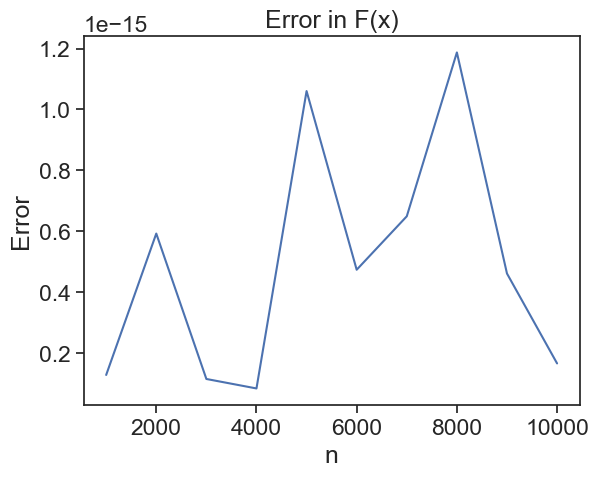

In [48]:
errorFValues = np.absolute(errorF(fValues))
errorGValues = np.absolute(errorG(gValues))
errorHValues = np.absolute(errorH(hValues))


plt.plot(xValues, errorFValues)
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Error in F(x)")
plt.show();


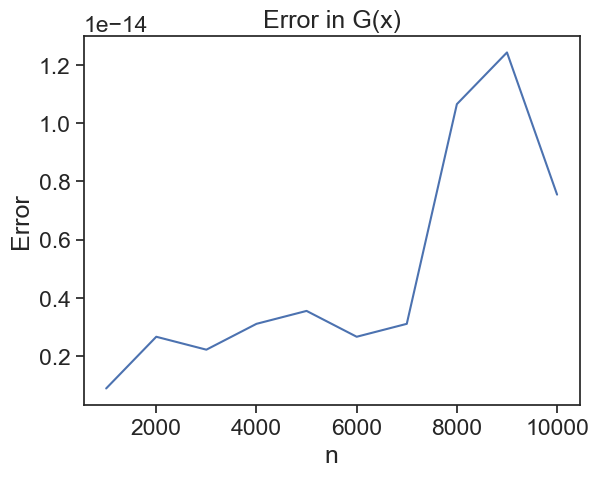

In [49]:
plt.plot(xValues, errorGValues)
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Error in G(x)")
plt.show();

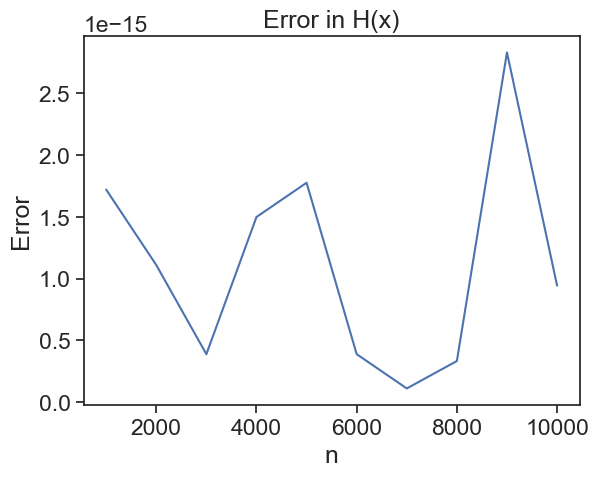

In [50]:
plt.plot(xValues, errorHValues)
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Error in H(x)")
plt.show();